In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
!pip install geopandas
import geopandas as gpd

In [2]:
map_df = gpd.read_file('diaphantinh.geojson')
map_df.head()

,gid,code,ten_tinh,geometry
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."


In [3]:
df_draw = map_df[["ten_tinh", "geometry"]]
df_draw

,ten_tinh,geometry
0,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."
...,...,...
58,Trà Vinh,"MULTIPOLYGON (((106.33031 10.01151, 106.35479 ..."
59,Tuyên Quang,"MULTIPOLYGON (((105.21744 22.66234, 105.21968 ..."
60,Vĩnh Long,"MULTIPOLYGON (((106.02713 10.28630, 106.02695 ..."
61,Vĩnh Phúc,"MULTIPOLYGON (((105.58500 21.53527, 105.59105 ..."


In [4]:
df_week = pd.read_csv("week.csv")
df_month = pd.read_csv("month.csv")
df_quarter = pd.read_csv("quarter.csv")
df_week.rename(columns={'0': "Tuần"}, inplace=True)
df_month.rename(columns={'0': "Tháng"}, inplace=True)
df_quarter.rename(columns={'0': "Quý"}, inplace=True)

In [5]:
df_draw.loc[1, 'ten_tinh'] = 'Bà Rịa – Vũng Tàu'
df_draw.loc[12, 'ten_tinh'] = 'Cần Thơ'
df_draw.loc[28, 'ten_tinh'] = 'Hoà Bình'
df_draw.loc[30, 'ten_tinh'] = 'Khánh Hoà'
df_draw.loc[44, 'ten_tinh'] = 'Quảng Bình'
df_draw.loc[54, 'ten_tinh'] = 'Thanh Hoá'
df_draw.loc[15, 'ten_tinh'] = 'Đắk Lắk'
df_draw.loc[16, 'ten_tinh'] = 'Đắk Nông'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [6]:
df_draw

,ten_tinh,geometry
0,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,Bà Rịa – Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."
...,...,...
58,Trà Vinh,"MULTIPOLYGON (((106.33031 10.01151, 106.35479 ..."
59,Tuyên Quang,"MULTIPOLYGON (((105.21744 22.66234, 105.21968 ..."
60,Vĩnh Long,"MULTIPOLYGON (((106.02713 10.28630, 106.02695 ..."
61,Vĩnh Phúc,"MULTIPOLYGON (((105.58500 21.53527, 105.59105 ..."


In [7]:
df_merge = pd.merge(df_draw, df_week, how="left", left_on="ten_tinh", right_on="Tỉnh thành")

In [8]:
df_merge.drop(columns=["Tỉnh thành"], inplace=True)

In [9]:
df_merge = pd.merge(df_merge, df_month, how="left", left_on="ten_tinh", right_on="Tỉnh thành")
df_merge.drop(columns=["Tỉnh thành"], inplace=True)
df_merge = pd.merge(df_merge, df_quarter, how="left", left_on="ten_tinh", right_on="Tỉnh thành")
df_merge.drop(columns=["Tỉnh thành"], inplace=True)

In [10]:
df_merge

,ten_tinh,geometry,Tuần,Tháng,Quý
0,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...",1.0,NaN,NaN
1,Bà Rịa – Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8...",2.0,NaN,NaN
2,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...",3.0,NaN,NaN
3,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ...",2.0,NaN,NaN
4,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...",NaN,NaN,NaN
...,...,...,...,...,...
58,Trà Vinh,"MULTIPOLYGON (((106.33031 10.01151, 106.35479 ...",NaN,NaN,NaN
59,Tuyên Quang,"MULTIPOLYGON (((105.21744 22.66234, 105.21968 ...",NaN,NaN,NaN
60,Vĩnh Long,"MULTIPOLYGON (((106.02713 10.28630, 106.02695 ...",1.0,NaN,NaN
61,Vĩnh Phúc,"MULTIPOLYGON (((105.58500 21.53527, 105.59105 ...",2.0,NaN,NaN


In [11]:
df_merge = df_merge.fillna(0)
df_merge.sort_values(by="Quý", ascending=False)

,ten_tinh,geometry,Tuần,Tháng,Quý
23,Hà Nội,"MULTIPOLYGON (((105.82965 21.37512, 105.83067 ...",21.0,10.0,5.0
39,Nghệ An,"MULTIPOLYGON (((105.98788 18.79644, 105.98757 ...",9.0,4.0,2.0
47,Quảng Ninh,"MULTIPOLYGON (((107.34549 20.68667, 107.34411 ...",4.0,2.0,2.0
29,Hưng Yên,"MULTIPOLYGON (((106.10046 20.99829, 106.10082 ...",5.0,1.0,1.0
6,Bến Tre,"MULTIPOLYGON (((106.42508 10.32019, 106.44474 ...",1.0,1.0,1.0
...,...,...,...,...,...
27,Hậu Giang,"MULTIPOLYGON (((105.57910 9.98585, 105.58078 9...",0.0,0.0,0.0
28,Hoà Bình,"MULTIPOLYGON (((104.92032 21.07708, 104.92034 ...",1.0,1.0,0.0
30,Khánh Hoà,"MULTIPOLYGON (((113.59087 6.95462, 113.58326 6...",1.0,1.0,0.0
1,Bà Rịa – Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8...",2.0,0.0,0.0


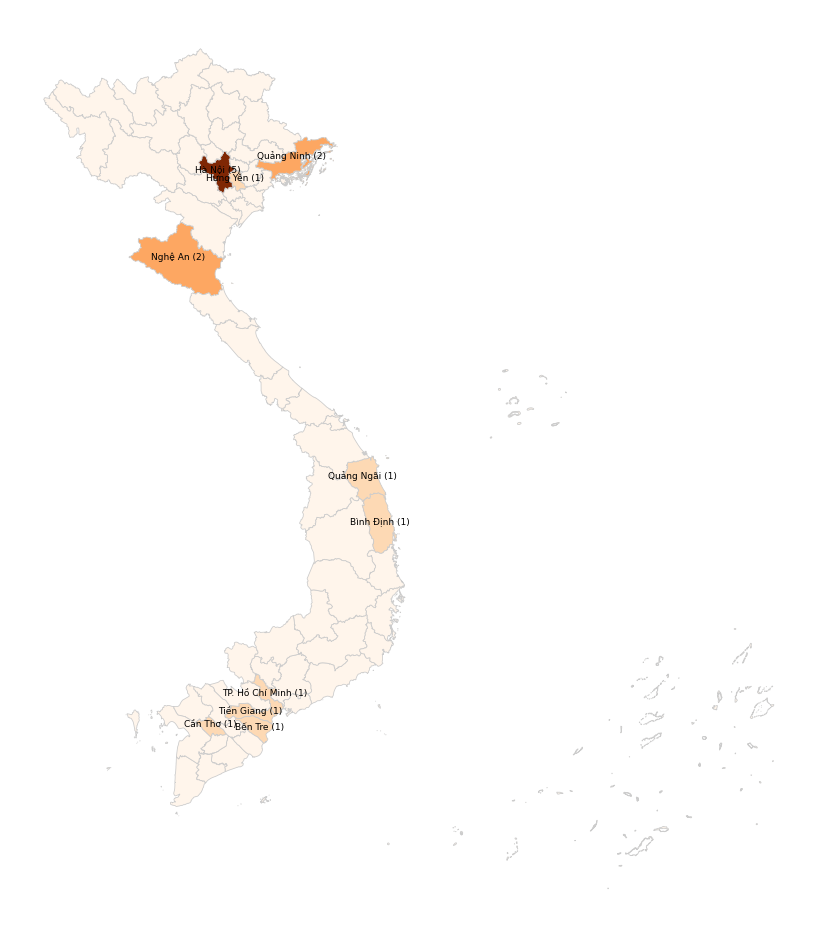

In [59]:
# set the value column that will be visualised
variable = 'Quý'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
df_merge.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
df_merge['coords'] = df_merge['geometry'].apply(lambda x: x.representative_point().coords[:])
df_merge['coords'] = [coords[0] for coords in df_merge['coords']]
df_merge.sort_values(by=['Quý'], ascending=False, inplace=True)
for idx, row in df_merge[df_merge['Quý'] != 0].iterrows():
    ax.annotate(s=row['ten_tinh'] + f" ({str(int(row['Quý']))})", xy=row['coords'],horizontalalignment='center', fontsize=9, color="black")

plt.savefig(f"Quarter.jpg", bbox_inches='tight', dpi=150, quality=95)

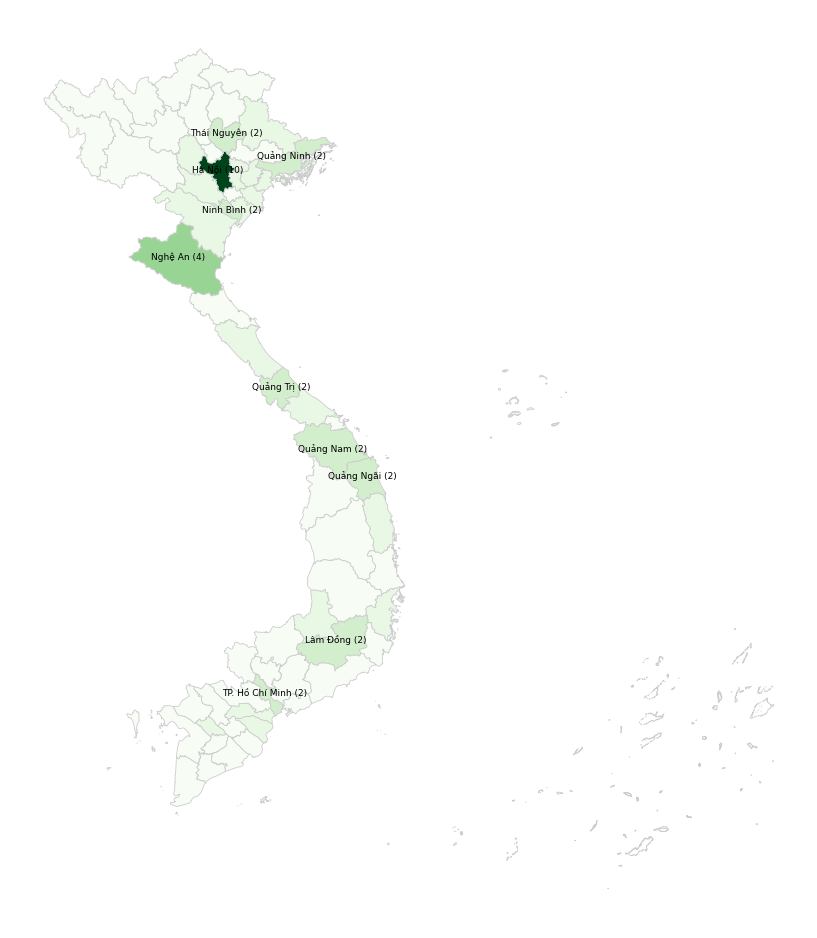

In [60]:
# set the value column that will be visualised
variable = 'Tháng'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
df_merge.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
df_merge['coords'] = df_merge['geometry'].apply(lambda x: x.representative_point().coords[:])
df_merge['coords'] = [coords[0] for coords in df_merge['coords']]
df_merge.sort_values(by=['Tháng'], ascending=False, inplace=True)
for idx, row in df_merge[df_merge['Tháng'] != 0][:10].iterrows():
    ax.annotate(s=row['ten_tinh'] + f" ({str(int(row['Tháng']))})", xy=row['coords'],horizontalalignment='center', fontsize=9, color="black")

plt.savefig(f"Month.jpg", bbox_inches='tight', dpi=150, quality=95)

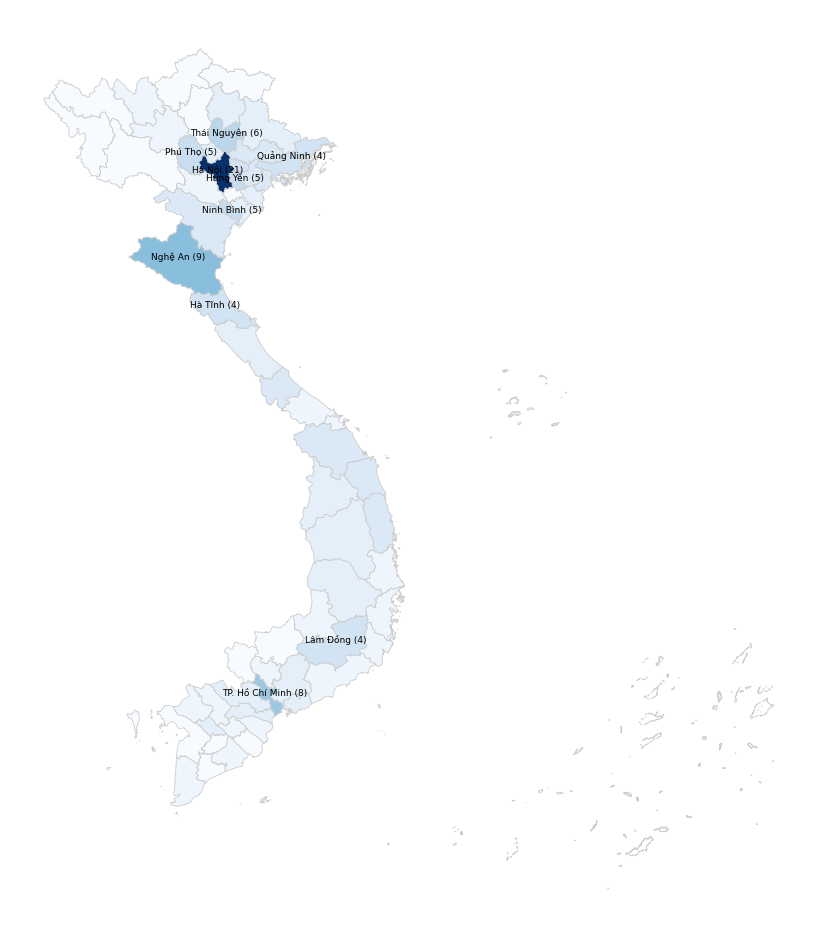

In [61]:
# set the value column that will be visualised
variable = 'Tuần'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
df_merge.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
df_merge['coords'] = df_merge['geometry'].apply(lambda x: x.representative_point().coords[:])
df_merge['coords'] = [coords[0] for coords in df_merge['coords']]
df_merge.sort_values(by=['Tuần'], ascending=False, inplace=True)
for idx, row in df_merge[df_merge['Tuần'] != 0][:10].iterrows():
    ax.annotate(s=row['ten_tinh'] + f" ({str(int(row['Tuần']))})", xy=row['coords'],horizontalalignment='center', fontsize=9, color="black")

plt.savefig(f"Week.jpg", bbox_inches='tight', dpi=150, quality=95)

In [47]:
df_merge["RatioMonth"] = df_merge["Tháng"] * 100 / df_merge["Tuần"]
df_merge["RatioQuarter"] = df_merge["Quý"] * 100 / df_merge["Tuần"]
df_merge.fillna(0, inplace=True)
df_merge.replace([np.inf, -np.inf], 0, inplace=True)
df_merge

,ten_tinh,geometry,Tuần,Tháng,Quý,coords,RatioMonth,RatioQuarter
23,Hà Nội,"MULTIPOLYGON (((105.82965 21.37512, 105.83067 ...",21.0,10.0,5.0,"(105.67086883891898, 20.975180092500075)",47.619048,23.809524
39,Nghệ An,"MULTIPOLYGON (((105.98788 18.79644, 105.98757 ...",9.0,4.0,2.0,"(104.85813453805783, 19.27631577500004)",44.444444,22.222222
57,TP. Hồ Chí Minh,"MULTIPOLYGON (((106.96860 10.45353, 106.96735 ...",8.0,2.0,1.0,"(106.62116550719442, 10.743676152000068)",25.000000,12.500000
53,Thái Nguyên,"MULTIPOLYGON (((105.70164 22.02634, 105.70385 ...",6.0,2.0,0.0,"(105.854702866378, 21.686925174000034)",33.333333,0.000000
42,Phú Thọ,"MULTIPOLYGON (((105.11401 21.70583, 105.11601 ...",5.0,1.0,0.0,"(105.13420493245168, 21.320865605000083)",20.000000,0.000000
...,...,...,...,...,...,...,...,...
59,Tuyên Quang,"MULTIPOLYGON (((105.21744 22.66234, 105.21968 ...",0.0,0.0,0.0,"(105.16741555086767, 22.09557349050004)",0.000000,0.000000
58,Trà Vinh,"MULTIPOLYGON (((106.33031 10.01151, 106.35479 ...",0.0,0.0,0.0,"(106.31888960807484, 9.805266181500103)",0.000000,0.000000
21,Hà Giang,"MULTIPOLYGON (((105.32929 23.38417, 105.33323 ...",0.0,0.0,0.0,"(104.9578486733987, 22.780824260500054)",0.000000,0.000000
51,Tây Ninh,"MULTIPOLYGON (((106.11000 11.74626, 106.11602 ...",0.0,0.0,0.0,"(106.10861758214273, 11.37122402150008)",0.000000,0.000000


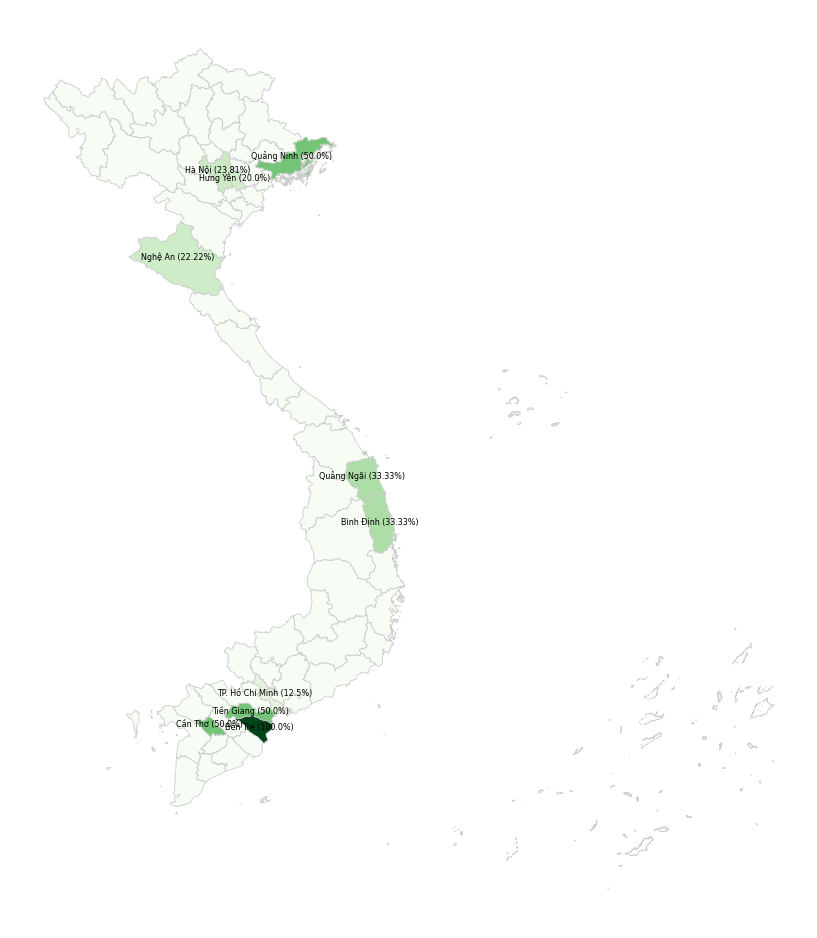

In [62]:
# set the value column that will be visualised
variable = 'RatioQuarter'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
df_merge.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
df_merge['coords'] = df_merge['geometry'].apply(lambda x: x.representative_point().coords[:])
df_merge['coords'] = [coords[0] for coords in df_merge['coords']]
df_merge.sort_values(by=['RatioQuarter'], ascending=False, inplace=True)
for idx, row in df_merge[df_merge['RatioQuarter'] != 0].iterrows():
    ax.annotate(s=row['ten_tinh'] + f" ({str(round(row['RatioQuarter'], 2))}%)", xy=row['coords'],horizontalalignment='center', fontsize=8, color="black")

plt.savefig(f"QuarterRatio.jpg", bbox_inches='tight', dpi=150, quality=95)

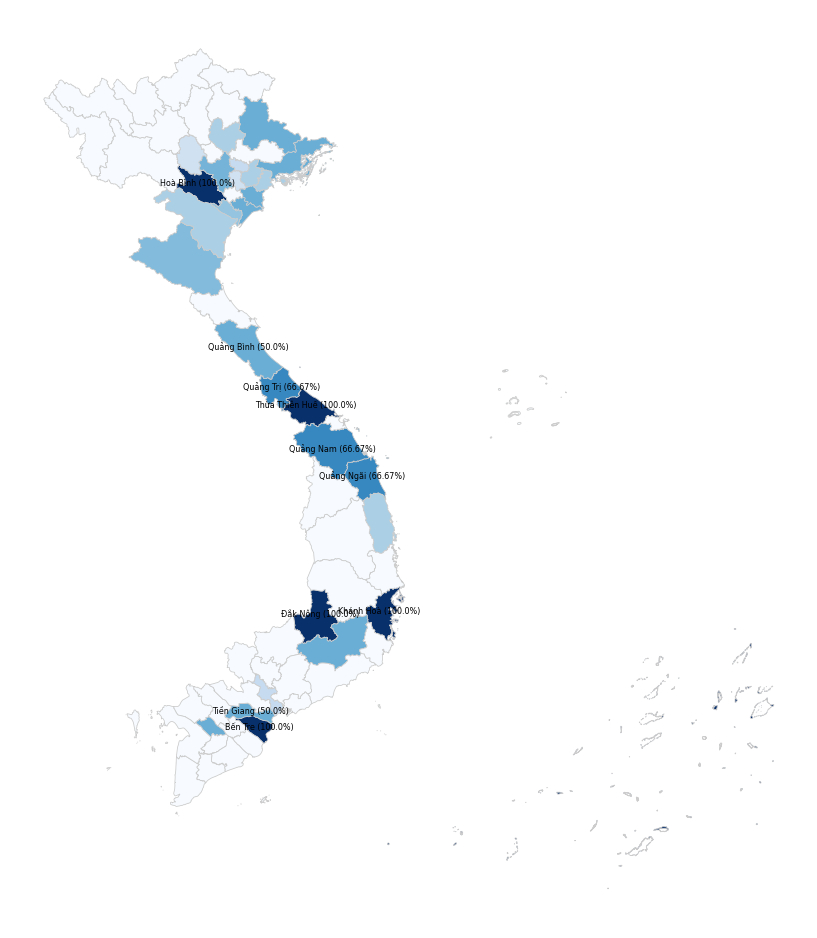

In [53]:
# set the value column that will be visualised
variable = 'RatioMonth'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
df_merge.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
df_merge['coords'] = df_merge['geometry'].apply(lambda x: x.representative_point().coords[:])
df_merge['coords'] = [coords[0] for coords in df_merge['coords']]
df_merge.sort_values(by=['RatioMonth'], ascending=False, inplace=True)
for idx, row in df_merge[df_merge['RatioMonth'] != 0][:10].iterrows():
    ax.annotate(s=row['ten_tinh'] + f" ({str(round(row['RatioMonth'], 2))}%)", xy=row['coords'],horizontalalignment='center', fontsize=8, color="black")

#plt.savefig(f"avg_by_area/CountKHTN.jpg", bbox_inches='tight', dpi=150, quality=95)

In [54]:
df_avg = pd.read_csv("avg.csv")
df_merge = pd.merge(df_merge, df_avg, how="left", left_on="ten_tinh", right_on="Tỉnh thành")
df_merge.drop(columns=["Tỉnh thành"], inplace=True)
df_merge

,ten_tinh,geometry,Tuần,Tháng,Quý,coords,RatioMonth,RatioQuarter,Tổng điểm
0,Bến Tre,"MULTIPOLYGON (((106.42508 10.32019, 106.44474 ...",1.0,1.0,1.0,"(106.51835846509114, 10.071714406000075)",100.0,100.0,190.0
1,Khánh Hoà,"MULTIPOLYGON (((113.59087 6.95462, 113.58326 6...",1.0,1.0,0.0,"(108.94211690515992, 12.335048726500062)",100.0,0.0,150.0
2,Đắk Nông,"MULTIPOLYGON (((107.85778 12.80281, 107.86036 ...",1.0,1.0,0.0,"(107.74092476727786, 12.282021941500075)",100.0,0.0,267.5
3,Hoà Bình,"MULTIPOLYGON (((104.92032 21.07708, 104.92034 ...",1.0,1.0,0.0,"(105.2555005325251, 20.71056731400005)",100.0,0.0,235.0
4,Thừa Thiên Huế,"MULTIPOLYGON (((107.42812 16.71097, 107.43533 ...",1.0,1.0,0.0,"(107.45992527613545, 16.370136016500055)",100.0,0.0,245.0
...,...,...,...,...,...,...,...,...,...
58,Bình Phước,"MULTIPOLYGON (((107.21940 12.20223, 107.22417 ...",0.0,0.0,0.0,"(106.91255950535358, 11.801023438500067)",0.0,0.0,NaN
59,Lai Châu,"MULTIPOLYGON (((103.33303 22.80670, 103.33399 ...",0.0,0.0,0.0,"(103.25993473310092, 22.251843699000062)",0.0,0.0,NaN
60,Tuyên Quang,"MULTIPOLYGON (((105.21744 22.66234, 105.21968 ...",0.0,0.0,0.0,"(105.16741555086767, 22.09557349050004)",0.0,0.0,NaN
61,Điện Biên,"MULTIPOLYGON (((102.35845 22.48274, 102.35965 ...",0.0,0.0,0.0,"(103.28207622347074, 21.72123063950009)",0.0,0.0,NaN


In [55]:
df_merge.fillna(0, inplace=True)

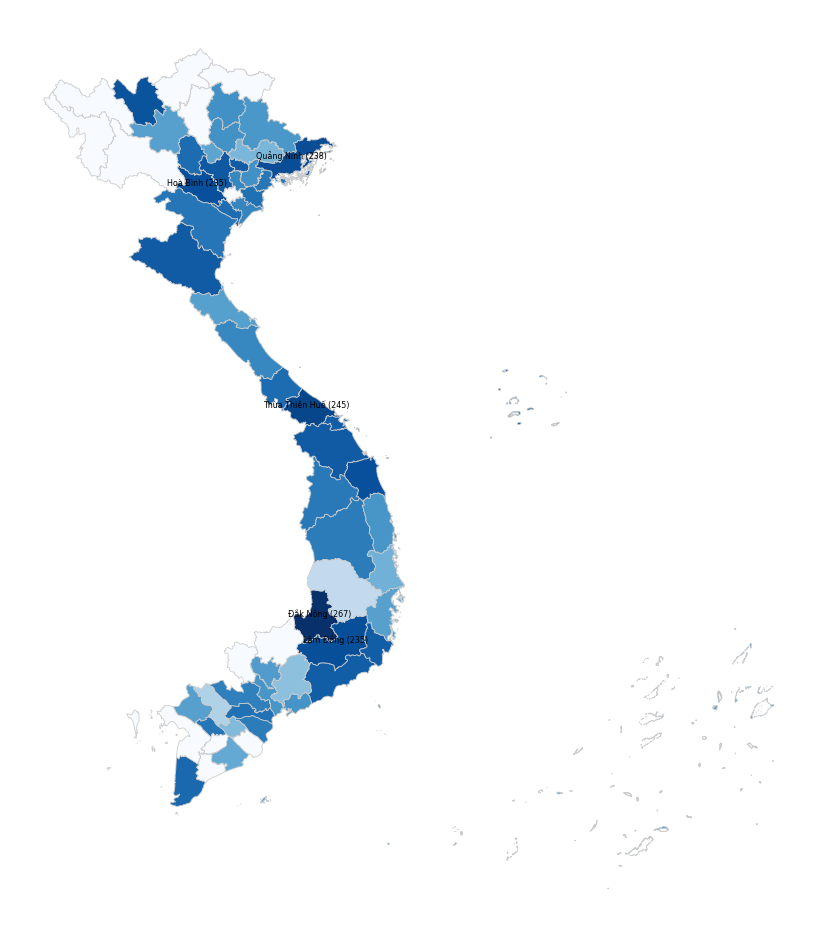

In [58]:
# set the value column that will be visualised
variable = 'Tổng điểm'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# create map
df_merge.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
df_merge['coords'] = df_merge['geometry'].apply(lambda x: x.representative_point().coords[:])
df_merge['coords'] = [coords[0] for coords in df_merge['coords']]
df_merge.sort_values(by=['Tổng điểm'], ascending=False, inplace=True)
for idx, row in df_merge[df_merge['Tổng điểm'] != 0][:5].iterrows():
    ax.annotate(s=row['ten_tinh'] + f" ({str(int(row['Tổng điểm']))})", xy=row['coords'],horizontalalignment='center', fontsize=8, color="black")

#plt.savefig(f"avg_by_area/CountKHTN.jpg", bbox_inches='tight', dpi=150, quality=95)